In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Siranjeevi C\Data Science - Python\Mispriced Diamonds\Mispriced-Diamonds.csv')


In [3]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [4]:
df = remove_outlier(df,'price')
df.shape

(50400, 3)

In [5]:
#collecting X and Y
X = df['carat'].values
Y = df['price'].values

In [6]:
df.info

<bound method DataFrame.info of        carat clarity  price
0       0.23     SI2    326
1       0.21     SI1    326
2       0.23     VS1    327
3       0.29     VS2    334
4       0.31     SI2    335
5       0.24    VVS2    336
6       0.24    VVS1    336
7       0.26     SI1    337
8       0.22     VS2    337
9       0.23     VS1    338
10      0.30     SI1    339
11      0.23     VS1    340
12      0.22     SI1    342
13      0.31     SI2    344
14      0.20     SI2    345
15      0.32      I1    345
16      0.30     SI2    348
17      0.30     SI1    351
18      0.30     SI1    351
19      0.30     SI1    351
20      0.30     SI2    351
21      0.23     VS2    352
22      0.23     VS1    353
23      0.31     SI1    353
24      0.31     SI1    353
25      0.23    VVS2    354
26      0.24     VS1    355
27      0.30     VS2    357
28      0.23     VS2    357
29      0.23     VS1    357
...      ...     ...    ...
53910   0.70     SI1   2753
53911   0.57      IF   2753
53912   0.61    

In [7]:
df.describe()

,carat,price
count,50400.000000,50400.000000
mean,0.723657,3159.460833
std,0.383757,2764.700316
min,0.200000,326.000000
25%,0.380000,911.000000
50%,0.700000,2155.000000
75%,1.010000,4669.000000
max,3.650000,11883.000000


In [8]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
df['clarity'] = encoder.fit_transform(df['clarity'])

In [9]:
df.head(5)

,carat,clarity,price
0,0.23,3,326
1,0.21,2,326
2,0.23,4,327
3,0.29,5,334
4,0.31,3,335


# Train Data 

In [10]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2 Score is ', r2_score(y_pred,y_test))
print('Mean_squared_Error', mean_squared_error(y_pred,y_test))

R2 Score is  0.8428887104418168
Mean_squared_Error 1026764.5216851592


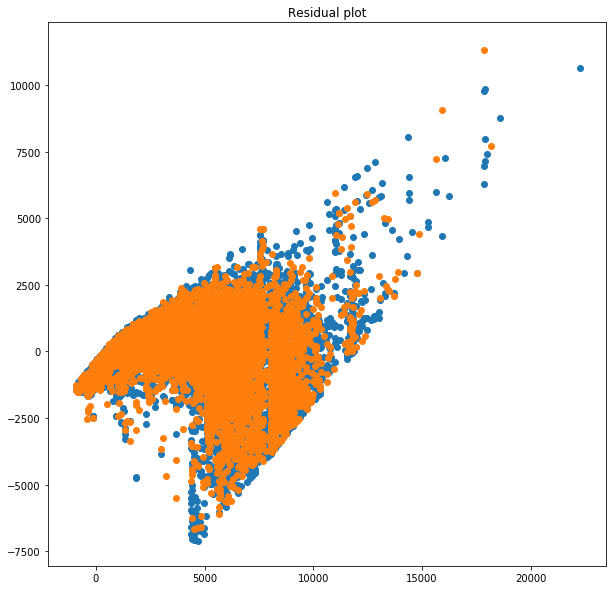

In [20]:
plt.rcParams['figure.figsize'] = [10,10]
plt.scatter(model.predict(x_train), model.predict(x_train)-y_train)
plt.scatter(model.predict(x_test), model.predict(x_test)-y_test)
plt.title('Residual plot')
plt.show()

In [15]:
#Gradient Descent method
#Mean of X and Y
Mean_X = np.mean(X)
Mean_Y = np.mean(Y)
#Total number of values 
m = len(X)
#using the formula to calculate b1 and b0
numer = 0
denom = 0

for i in range (m):
    numer += (X[i]-Mean_X)*(Y[i]-Mean_Y)
    denom += (X[i]-Mean_X)**2
    
b1 = numer / denom
b0 = Mean_Y - b1*Mean_X
print(b1, b0)

6597.868840279988 -1615.1314623679327
